# Import the data from the CSV file

In [2]:
import pandas as pd

data = pd.read_csv('dormdata.csv')

data

,Dorm,URM,LGB,lessthaneightyk,fouryrgrad,sixyrgrad
0,Next,20.5,11.0,23.2,86.4,94.3
1,Baker,16.0,4.2,20.6,87.8,95.7
2,Burton,20.8,10.2,18.6,86.3,94.0
3,EC,19.2,38.0,24.9,75.3,89.4
4,MacGregor,27.2,8.3,28.2,80.9,92.2
5,Maseeh,21.4,6.4,23.3,87.2,NaN
6,McCormick,20.2,8.1,27.9,88.8,95.8
7,New,43.5,16.1,31.4,80.5,91.3
8,Random,17.2,40.8,35.5,75.3,89.4
9,Senior,36.7,40.0,30.9,59.7,78.1


# Plot the data

(10, 50)

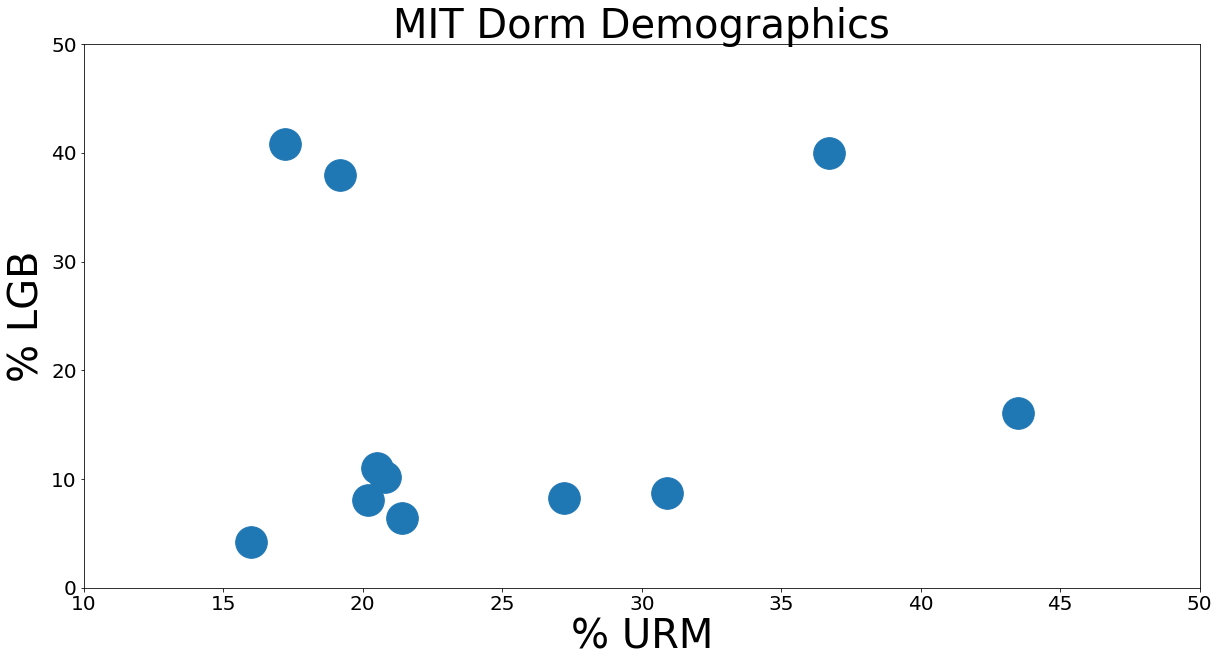

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(20,10))
plt.scatter(data.URM, data.LGB,s=1000)
plt.ylabel('% LGB',fontsize=40)
plt.xlabel('% URM',fontsize=40)
plt.title('MIT Dorm Demographics',fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylim([0,50])
plt.xlim([10,50])

# Run a multiple regression

In [4]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='fouryrgrad ~ URM + LGB', data=data).fit()

lm.params

Intercept    98.205243
URM          -0.356221
LGB          -0.475994
dtype: float64

In [5]:
lm.summary()

C:\Users\britni\Anaconda2\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             fouryrgrad   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     23.44
Date:                Mon, 03 Jul 2017   Prob (F-statistic):           0.000452
Time:                        15:48:31   Log-Likelihood:                -28.068
No. Observations:                  11   AIC:                             62.14
Df Residuals:                       8   BIC:                             63.33
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     98.2052      3.604     27.251      0.000      89.895     106.515
URM           -0.3562      0.132     -2.698      0.027      -0.661      -0.052
LGB           -0.4760      0.080     -5.987      0.000      -0.659      -0.293
==============================================================================
Omnibus:                        0.929   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                0.333
Skew:                          -0.415   Prob(JB):                        0.847
Kurtosis:                       2.802   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(55, 95)

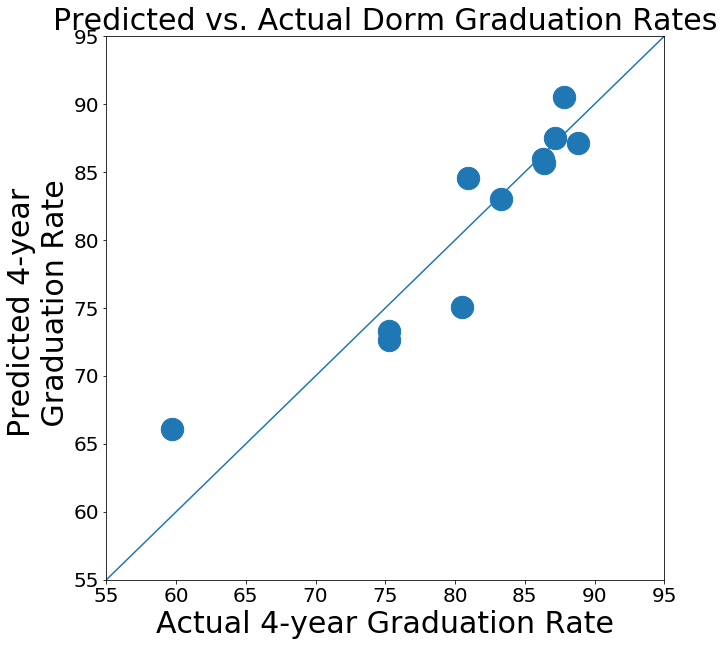

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(data.fouryrgrad,lm.predict(data),s=500)
plt.plot(range(1,100),range(1,100))
plt.ylabel('Predicted 4-year \n Graduation Rate',fontsize=30)
plt.xlabel('Actual 4-year Graduation Rate',fontsize=30)
plt.title('Predicted vs. Actual Dorm Graduation Rates',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylim([55,95])
plt.xlim([55,95])